In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from catboost import CatBoost, CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
data1 = pd.read_csv('gestures.csv')
data2 = pd.read_csv('gestTwo.csv')
data3 = pd.read_csv('subONE.csv')
data4 = pd.read_csv('gest3.csv')
data5 = pd.read_csv('gest4.csv')
data6 = pd.read_csv('gest5.csv')
data7 = pd.read_csv('gest6.csv')

In [3]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7])

In [4]:
data

,wrist_y,palm_center_y,thumb_y,index_y,middle_y,ring_y,pinky_y,target
0,0.815622,0.713642,0.701436,0.634435,0.715803,0.769348,0.820076,left
1,0.824647,0.729888,0.709416,0.645253,0.723260,0.780551,0.828959,left
2,0.790496,0.676778,0.667507,0.601649,0.685105,0.739549,0.789257,left
3,0.799493,0.679214,0.658845,0.603519,0.679705,0.737709,0.788017,left
4,0.849330,0.751559,0.707395,0.679874,0.741585,0.797559,0.848467,left
...,...,...,...,...,...,...,...,...
611,0.754907,0.587917,0.584537,0.592126,0.609470,0.631018,0.653805,stop
612,0.761234,0.603620,0.596373,0.609486,0.625548,0.642239,0.660407,stop
613,0.762909,0.606641,0.603885,0.613126,0.631360,0.645927,0.662489,stop
614,0.767356,0.608073,0.598621,0.609179,0.627797,0.651028,0.677909,stop


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 0 to 615
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wrist_y        7718 non-null   float64
 1   palm_center_y  7718 non-null   float64
 2   thumb_y        7718 non-null   float64
 3   index_y        7718 non-null   float64
 4   middle_y       7718 non-null   float64
 5   ring_y         7718 non-null   float64
 6   pinky_y        7718 non-null   float64
 7   target         7718 non-null   object 
dtypes: float64(7), object(1)
memory usage: 542.7+ KB


In [6]:
data.isna().sum()

wrist_y          0
palm_center_y    0
thumb_y          0
index_y          0
middle_y         0
ring_y           0
pinky_y          0
target           0
dtype: int64

<Axes: >

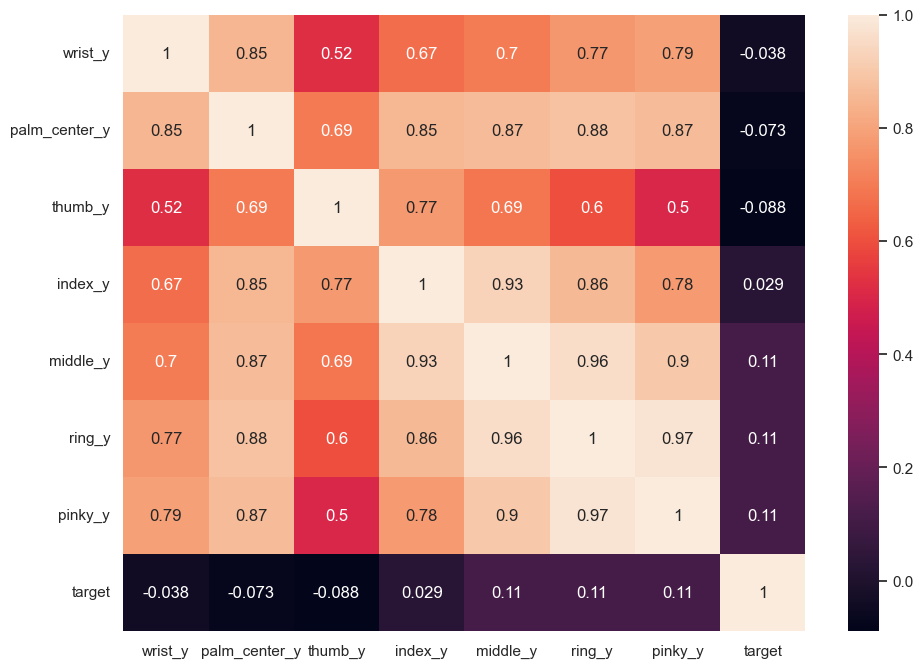

In [7]:
corData = data.copy()
corData['target'] = corData['target'].astype('category')
corData['target'] = corData['target'].cat.codes

corr_matrix = corData.corr()

sns.set(rc={'figure.figsize': (11, 8)})

sns.heatmap(corr_matrix, annot=True)

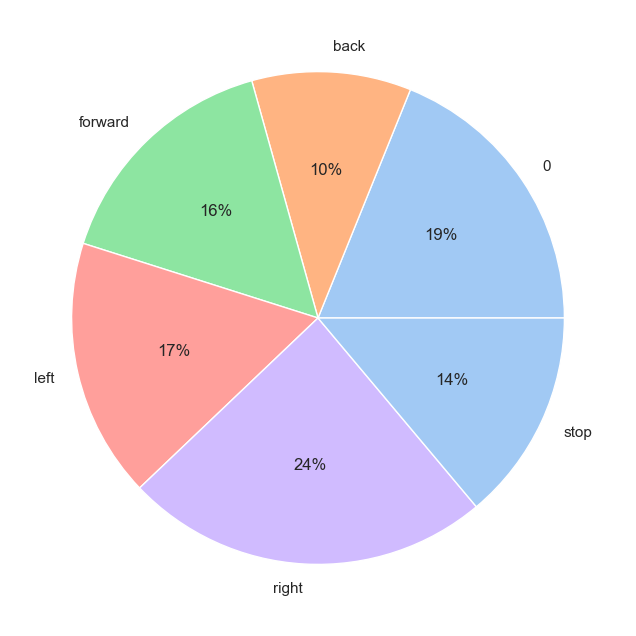

In [8]:
colors = sns.color_palette('pastel')[0:5]
labels = sorted(data['target'].unique())
dt = np.array([len(data[data['target'] == i])for i in labels])
plt.pie(dt, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

In [9]:
X = data.drop(columns=['target'])
Y = data['target']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                  test_size=0.1,  # доля изображений для проверки
                                                  random_state=42)

In [21]:
model_catBOOST_search = CatBoostClassifier(iterations=1801,
                                           learning_rate=0.05,
                                           depth=10,
                                           l2_leaf_reg=3.5,
                                        #    model_size_reg=50,
                                        #    one_hot_max_size=50,
                                          #  eval_metric='AUC',
                                        #    rsm = 1,
                                          #  loss_function='',
                                           border_count=64,
                                           verbose=False)
model_catBOOST_search.fit(X, Y)

### Test

In [22]:
predCBF = model_catBOOST_search.predict(X_test)

In [23]:
print(accuracy_score(predCBF, Y_test))

0.9896373056994818


In [24]:
print(classification_report(Y_test, predCBF, target_names=data['target'].unique()))

              precision    recall  f1-score   support

        left       1.00      0.99      1.00       147
       right       1.00      1.00      1.00        75
     forward       1.00      1.00      1.00       139
        back       0.98      0.97      0.97       135
        stop       0.97      0.99      0.98       176
           0       1.00      0.99      0.99       100

    accuracy                           0.99       772
   macro avg       0.99      0.99      0.99       772
weighted avg       0.99      0.99      0.99       772



### ALL

In [25]:
predCBF = model_catBOOST_search.predict(X)

In [26]:
print(accuracy_score(predCBF, Y))

0.988209380668567


In [17]:
print(classification_report(Y, predCBF, target_names=data['target'].unique()))

              precision    recall  f1-score   support

        left       0.99      0.98      0.99      1457
       right       0.99      1.00      0.99       807
     forward       1.00      1.00      1.00      1217
        back       0.95      0.93      0.94      1313
        stop       0.94      0.96      0.95      1852
           0       0.99      0.99      0.99      1072

    accuracy                           0.97      7718
   macro avg       0.98      0.98      0.98      7718
weighted avg       0.97      0.97      0.97      7718



In [18]:
with open('comandsDetcet.bf', '+wb') as bestModel:
    pickle.dump(model_catBOOST_search, bestModel)

In [30]:
data = data.copy()
data['target'] = data['target'].astype('category')
data['target'] = data['target'].cat.codes

In [34]:
X = data.drop(columns=['target'])
Y = data['target']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                  test_size=0.1,  # доля изображений для проверки
                                                  random_state=42)

In [50]:
myModel = Sequential()


myModel.add(Dense(128, activation="elu", input_shape=(X.shape[1], )))
myModel.add(Dense(128, activation="elu"))
myModel.add(Dense(128, activation="elu"))
myModel.add(Dense(128, activation="elu"))
myModel.add(Dense(6, activation="softmax"))
myModel.summary()


INIT_LR = 0.001
# opt = SGD(lr=INIT_LR)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

myModel.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]
              )  #categorial_crosentropy


print ("Model compiled")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1024      
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 6)                 774       
                                                                 
Total params: 51334 (200.52 KB)
Trainable params: 51334 (200.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model compiled


In [51]:
# тренируем нейронную сеть
# меняйте гиперпараметры в блоке кода выше и здесь, чтобы получить точность выше
EPOCHS = 500

# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/ConvNN_{epoch:2d}_{val_accuracy:.3f}.h5', verbose=1, period=10)
checkpointer = ModelCheckpoint(filepath='myModel.h5',
                               verbose=2,
                               save_best_only=True
)

# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/NSK_Lesson5/point.h5', verbose=1)

H = myModel.fit(X, Y, validation_data=(X_test, Y_test),
              epochs=EPOCHS,
              shuffle=True, batch_size=32,
              callbacks=[checkpointer])

print("Model trained")

Epoch 1/500
230/242 [===========================>..] - ETA: 0s - loss: 1.0409 - accuracy: 0.5901
Epoch 1: val_loss improved from inf to 0.77802, saving model to myModel.h5
242/242 [==============================] - 2s 4ms/step - loss: 1.0269 - accuracy: 0.5948 - val_loss: 0.7780 - val_accuracy: 0.7111
Epoch 2/500
 32/242 [==>...........................] - ETA: 0s - loss: 0.7595 - accuracy: 0.7295

c:\Users\Egor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


230/242 [===========================>..] - ETA: 0s - loss: 0.7659 - accuracy: 0.7045
Epoch 2: val_loss improved from 0.77802 to 0.72158, saving model to myModel.h5
242/242 [==============================] - 1s 3ms/step - loss: 0.7590 - accuracy: 0.7068 - val_loss: 0.7216 - val_accuracy: 0.7293
Epoch 3/500
240/242 [============================>.] - ETA: 0s - loss: 0.6538 - accuracy: 0.7401
Epoch 3: val_loss improved from 0.72158 to 0.62675, saving model to myModel.h5
242/242 [==============================] - 1s 3ms/step - loss: 0.6539 - accuracy: 0.7400 - val_loss: 0.6267 - val_accuracy: 0.7798
Epoch 4/500
238/242 [============================>.] - ETA: 0s - loss: 0.6359 - accuracy: 0.7581
Epoch 4: val_loss did not improve from 0.62675
242/242 [==============================] - 1s 3ms/step - loss: 0.6365 - accuracy: 0.7577 - val_loss: 0.6342 - val_accuracy: 0.7694
Epoch 5/500
227/242 [===========================>..] - ETA: 0s - loss: 0.6008 - accuracy: 0.7709
Epoch 5: val_loss improved

Text(0.5, 1.0, 'Accuracy')

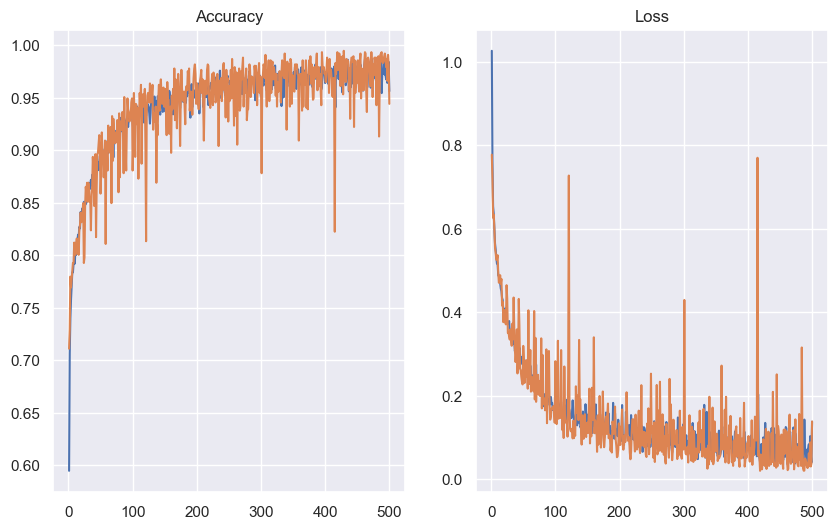

In [52]:
plt.figure(figsize=(10, 6))
# N = np.arange(0, EPOCHS)

acc = H.history["accuracy"]
val_acc = H.history['val_accuracy']

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(val_acc) + 1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, len(val_acc) + 1), H.history["val_loss"], label="vall_loss")
plt.title("Loss")

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(acc) + 1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, len(acc) + 1), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")